<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/notebooks/starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



## Get Data

In [4]:
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

## Data Wrangling

In [5]:
bikes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,16637.0,2.482058,1.085930,1.00,2.0000,2.00,3.0000,4.0
hr,16637.0,11.547875,6.914199,0.00,6.0000,12.00,18.0000,23.0
holiday,16637.0,0.028671,0.166885,0.00,0.0000,0.00,0.0000,1.0
workingday,16637.0,0.684378,0.464777,0.00,0.0000,1.00,1.0000,1.0
weathersit,16637.0,1.415580,0.637298,1.00,1.0000,1.00,2.0000,4.0
hum,16637.0,0.624756,0.193227,0.00,0.4700,0.62,0.7800,1.0
windspeed,16637.0,12.750436,8.168415,0.00,7.0000,13.00,17.0000,57.0
temp_c,16637.0,15.723008,9.041349,-7.06,7.9800,16.44,23.0200,39.0
feels_like_c,16637.0,15.852141,11.322751,-16.00,5.9978,17.00,24.9992,50.0
casual,16637.0,36.471239,49.995203,0.00,4.0000,17.00,50.0000,367.0


In [6]:
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1


In [7]:
bikes.isna().sum()

dteday          0
season          0
hr              0
holiday         0
workingday      0
weathersit      0
hum             0
windspeed       0
temp_c          0
feels_like_c    0
casual          0
registered      0
dtype: int64

In [8]:
bikes.shape

(16637, 12)

In [9]:
bikes=bikes.dropna()

In [10]:
# rename the columns as the one in clean data to use merge by this column
bikes.rename(columns={'hum': 'humidity_percentage'}, inplace = True)
bikes.rename(columns={'temp_c': 'temperature_celsius'}, inplace = True)
bikes.rename(columns={'feels_like_c': 'feels_like_temperature_celsius'}, inplace = True)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,humidity_percentage,windspeed,temperature_celsius,feels_like_temperature_celsius,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1


In [11]:
print(bikes['season'].value_counts())
print(bikes['weathersit'].value_counts())

3    4496
2    4409
1    3980
4    3752
Name: season, dtype: int64
1    11078
2     4207
3     1349
4        3
Name: weathersit, dtype: int64


In [12]:
# categorical feautures  season : season (1:winter, 2:spring, 3:summer, 4:fall) 
bikes['season']=bikes['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
# weathersit weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy ,- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds , - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
bikes['weathersit']=bikes['weathersit'].map({1:'clear', 2:'mist_cloudy', 3:'light_rain_snow', 4:'heavy_rain_snow'})

In [13]:
print(bikes['season'].value_counts())
print(bikes['weathersit'].value_counts())

summer    4496
spring    4409
winter    3980
fall      3752
Name: season, dtype: int64
clear              11078
mist_cloudy         4207
light_rain_snow     1349
heavy_rain_snow        3
Name: weathersit, dtype: int64


In [14]:
df = pd.get_dummies(bikes, columns = ['season', 'weathersit'], prefix='', prefix_sep='')
df.tail()

,dteday,hr,holiday,workingday,humidity_percentage,windspeed,temperature_celsius,feels_like_temperature_celsius,casual,registered,fall,spring,summer,winter,clear,heavy_rain_snow,light_rain_snow,mist_cloudy
16632,11/30/12,19,0,1,0.66,0,7.04,7.0010,18,359,1,0,0,0,1,0,0,0
16633,11/30/12,20,0,1,0.66,0,7.04,7.0010,12,233,1,0,0,0,1,0,0,0
16634,11/30/12,21,0,1,0.75,6,6.10,5.0012,14,169,1,0,0,0,1,0,0,0
16635,11/30/12,22,0,1,0.75,0,6.10,5.9978,18,145,1,0,0,0,1,0,0,0
16636,11/30/12,23,0,1,0.75,6,6.10,5.0012,11,99,1,0,0,0,0,0,0,1


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hr,16637.0,11.547875,6.914199,0.00,6.0000,12.00,18.0000,23.0
holiday,16637.0,0.028671,0.166885,0.00,0.0000,0.00,0.0000,1.0
workingday,16637.0,0.684378,0.464777,0.00,0.0000,1.00,1.0000,1.0
humidity_percentage,16637.0,0.624756,0.193227,0.00,0.4700,0.62,0.7800,1.0
windspeed,16637.0,12.750436,8.168415,0.00,7.0000,13.00,17.0000,57.0
temperature_celsius,16637.0,15.723008,9.041349,-7.06,7.9800,16.44,23.0200,39.0
feels_like_temperature_celsius,16637.0,15.852141,11.322751,-16.00,5.9978,17.00,24.9992,50.0
casual,16637.0,36.471239,49.995203,0.00,4.0000,17.00,50.0000,367.0
registered,16637.0,154.005770,151.319818,0.00,35.0000,116.00,220.0000,886.0
fall,16637.0,0.225521,0.417938,0.00,0.0000,0.00,0.0000,1.0


In [16]:
# print out largest values
print(df['temperature_celsius'].nlargest(n=10))
print(df['feels_like_temperature_celsius'].nlargest(n=10))
print(df['windspeed'].nlargest(n=10))

13163    39.00
12972    38.06
4768     37.12
4934     37.12
4936     37.12
4937     37.12
4938     37.12
4939     37.12
12969    37.12
12970    37.12
Name: temperature_celsius, dtype: float64
4768     50.0000
4767     48.9968
4769     48.9968
4766     46.9970
4745     44.9972
4746     44.9972
4749     44.9972
4764     44.9972
12972    44.9972
4747     44.0006
Name: feels_like_temperature_celsius, dtype: float64
4315     57
4316     57
5635     56
1259     54
9956     54
1017     52
1125     50
1261     50
9653     48
11024    48
Name: windspeed, dtype: int64


In [17]:
# remove timestamp on training data 
df['date'] = pd.to_datetime(df['dteday'])
print ("min sale date, max sale date")
print(df['date'].min(), df['date'].max())

min sale date, max sale date
2011-01-01 00:00:00 2012-11-30 00:00:00


In [37]:
# day of the week
df['day'] = pd.DatetimeIndex(df['date']).day

In [38]:
# month
df['month'] = pd.DatetimeIndex(df['date']).month

In [39]:
# day of week
df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek

In [44]:
# week day name
df['day_name'] = pd.DatetimeIndex(df['date']).day_name

In [41]:
# month of year
df['month_name'] = pd.DatetimeIndex(df['date']).month_name

In [42]:
df.tail()

,dteday,hr,holiday,workingday,humidity_percentage,windspeed,temperature_celsius,feels_like_temperature_celsius,casual,registered,...,clear,heavy_rain_snow,light_rain_snow,mist_cloudy,date,day,month,dayofweek,month_name,day_name
16632,11/30/12,19,0,1,0.66,0,7.04,7.0010,18,359,...,1,0,0,0,2012-11-30,30,11,4,<bound method inherit_from_data.<locals>.metho...,<bound method inherit_from_data.<locals>.metho...
16633,11/30/12,20,0,1,0.66,0,7.04,7.0010,12,233,...,1,0,0,0,2012-11-30,30,11,4,<bound method inherit_from_data.<locals>.metho...,<bound method inherit_from_data.<locals>.metho...
16634,11/30/12,21,0,1,0.75,6,6.10,5.0012,14,169,...,1,0,0,0,2012-11-30,30,11,4,<bound method inherit_from_data.<locals>.metho...,<bound method inherit_from_data.<locals>.metho...
16635,11/30/12,22,0,1,0.75,0,6.10,5.9978,18,145,...,1,0,0,0,2012-11-30,30,11,4,<bound method inherit_from_data.<locals>.metho...,<bound method inherit_from_data.<locals>.metho...
16636,11/30/12,23,0,1,0.75,6,6.10,5.0012,11,99,...,0,0,0,1,2012-11-30,30,11,4,<bound method inherit_from_data.<locals>.metho...,<bound method inherit_from_data.<locals>.metho...


## Split into Train & Test 

In [71]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

## Inspect the Data 

In [74]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13310 entries, 6202 to 5066
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dteday                          13310 non-null  object 
 1   hr                              13310 non-null  int64  
 2   holiday                         13310 non-null  int64  
 3   workingday                      13310 non-null  int64  
 4   humidity_percentage             13310 non-null  float64
 5   windspeed                       13310 non-null  int64  
 6   temperature_celsius             13310 non-null  float64
 7   feels_like_temperature_celsius  13310 non-null  float64
 8   casual                          13310 non-null  int64  
 9   registered                      13310 non-null  int64  
 10  fall                            13310 non-null  uint8  
 11  spring                          13310 non-null  uint8  
 12  summer                        

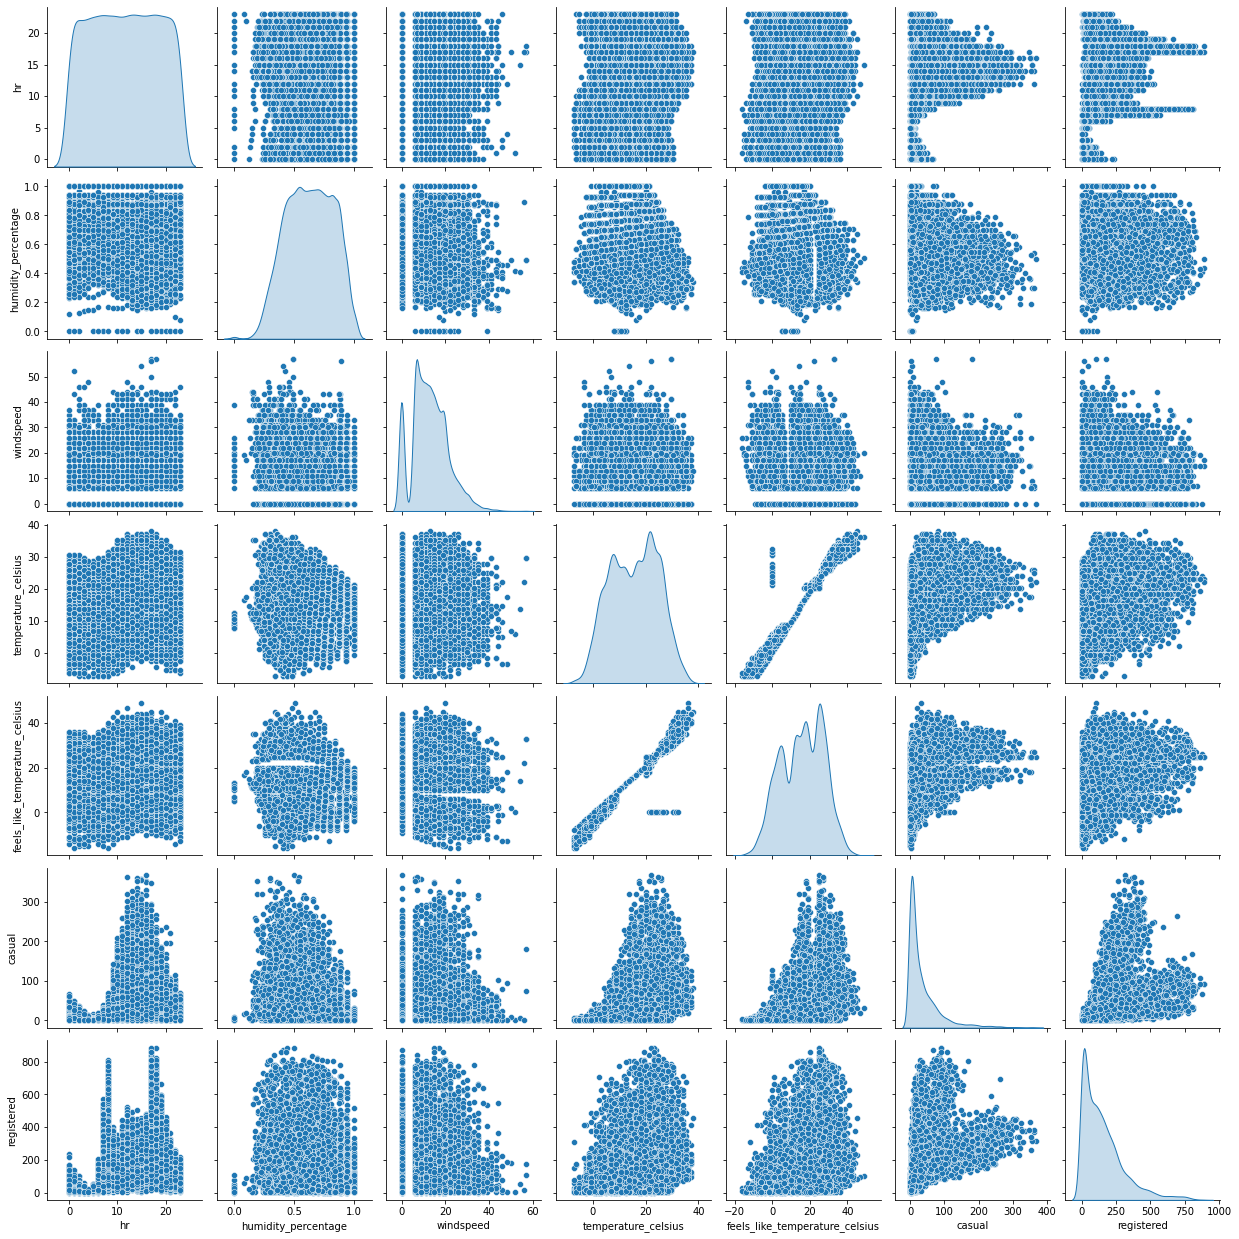

In [76]:
sns.pairplot(train_dataset[['hr', 'humidity_percentage', 'windspeed', 'temperature_celsius', 'feels_like_temperature_celsius', 'casual', 'registered']], diag_kind='kde')